In [11]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sklearn.model_selection
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [12]:
dataset_path = 'Admission_Predict_Ver1.1.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
dataset = raw_dataset.copy() # Borrar el raw copy, es para poder hacer prints sobre esto y no tener datos distintos

# Split into vectors the dataset. y_all being the chance, x_all the other cols
# Y also gets categorized in 5 classes as output asks for.
bins = pd.cut(dataset.pop("Chance of Admit "), bins=np.array([0, 0.5, 0.65, 0.8, 0.9, 1]), labels=[0,1,2,3,4])
y_all = keras.utils.to_categorical(bins, num_classes=5)
x_all = dataset

# Split dataset into train and tests. 33% used as asked.
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.33, random_state=0)

In [14]:
y_all

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [15]:
# Train dataset
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
81,82,340,120,4,5.0,5.0,9.50,1
401,402,315,105,2,3.0,3.0,8.34,0
302,303,322,105,2,3.0,3.0,8.45,1
499,500,327,113,4,4.5,4.5,9.04,0
471,472,311,103,3,2.0,4.0,8.09,0
455,456,305,102,2,1.5,2.5,7.64,0
160,161,315,103,1,1.5,2.0,7.86,0
478,479,318,103,3,4.0,4.5,8.49,1
364,365,313,102,3,3.5,4.0,8.90,1
496,497,337,117,5,5.0,5.0,9.87,1


In [16]:
# Test dataset
x_valid

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,91,318,106,2,4.0,4.0,7.92,1
254,255,321,114,4,4.0,5.0,9.12,0
283,284,321,111,3,2.5,3.0,8.90,1
445,446,328,116,5,4.5,5.0,9.08,1
461,462,301,102,3,2.5,2.0,8.13,1
15,16,314,105,3,3.5,2.5,8.30,0
316,317,298,101,2,1.5,2.0,7.86,0
489,490,302,110,3,4.0,4.5,8.50,0
159,160,297,100,1,1.5,2.0,7.90,0
153,154,324,105,3,3.0,4.0,8.75,0


In [17]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=tuple([x_train.shape[1]])),
    layers.Dropout(0.2),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(5, activation=tf.nn.softmax)
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mean_absolute_error', 'mean_squared_error', 'categorical_accuracy'])
  return model

In [18]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
___________________

In [19]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=200, validation_data=(x_valid, y_valid), verbose=1)

Train on 335 samples, validate on 165 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
335/335 [==============================] - 0s 754us/sample - loss: 4.5835 - mean_absolute_error: 0.3351 - mean_squared_error: 0.3295 - categorical_accuracy: 0.1612 - val_loss: 3.1956 - val_mean_absolute_error: 0.2844 - val_mean_squared_error: 0.2694 - val_categorical_accuracy: 0.2909
Epoch 2/200
335/335 [==============================] - 0s 25us/sample - loss: 4.0510 - mean_absolute_error: 0.2943 - mean_squared_error: 0.2906 - categorical_accuracy: 0.2627 - val_loss: 3.6860 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2362 - val_categorical_accuracy: 0.4061
Epoch 3/200
335/335 [==============================] - 0s 18us/sample - loss: 3.8441 - mean_absolute_error: 0.2743 - mean_squared_error: 0.2693 - categorical_accuracy: 0.3075 - val_loss: 3.8084 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 4/200
335/3

Epoch 28/200
335/335 [==============================] - 0s 70us/sample - loss: 3.4889 - mean_absolute_error: 0.2558 - mean_squared_error: 0.2511 - categorical_accuracy: 0.3582 - val_loss: 3.4260 - val_mean_absolute_error: 0.2430 - val_mean_squared_error: 0.2405 - val_categorical_accuracy: 0.3879
Epoch 29/200
335/335 [==============================] - 0s 27us/sample - loss: 3.6061 - mean_absolute_error: 0.2576 - mean_squared_error: 0.2530 - categorical_accuracy: 0.3552 - val_loss: 3.3941 - val_mean_absolute_error: 0.2400 - val_mean_squared_error: 0.2362 - val_categorical_accuracy: 0.4061
Epoch 30/200
335/335 [==============================] - 0s 34us/sample - loss: 3.5482 - mean_absolute_error: 0.2542 - mean_squared_error: 0.2499 - categorical_accuracy: 0.3672 - val_loss: 3.4556 - val_mean_absolute_error: 0.2439 - val_mean_squared_error: 0.2425 - val_categorical_accuracy: 0.3879
Epoch 31/200
335/335 [==============================] - 0s 23us/sample - loss: 3.3620 - mean_absolute_error: 

Epoch 56/200
335/335 [==============================] - 0s 25us/sample - loss: 3.2671 - mean_absolute_error: 0.2749 - mean_squared_error: 0.2648 - categorical_accuracy: 0.3104 - val_loss: 2.7908 - val_mean_absolute_error: 0.2463 - val_mean_squared_error: 0.2305 - val_categorical_accuracy: 0.3939
Epoch 57/200
335/335 [==============================] - 0s 20us/sample - loss: 3.0625 - mean_absolute_error: 0.2752 - mean_squared_error: 0.2639 - categorical_accuracy: 0.3104 - val_loss: 2.7485 - val_mean_absolute_error: 0.2476 - val_mean_squared_error: 0.2318 - val_categorical_accuracy: 0.4000
Epoch 58/200
335/335 [==============================] - 0s 21us/sample - loss: 3.1290 - mean_absolute_error: 0.2802 - mean_squared_error: 0.2652 - categorical_accuracy: 0.2955 - val_loss: 2.9304 - val_mean_absolute_error: 0.2446 - val_mean_squared_error: 0.2323 - val_categorical_accuracy: 0.3879
Epoch 59/200
335/335 [==============================] - 0s 17us/sample - loss: 3.1320 - mean_absolute_error: 

Epoch 84/200
335/335 [==============================] - 0s 20us/sample - loss: 2.5645 - mean_absolute_error: 0.2812 - mean_squared_error: 0.2602 - categorical_accuracy: 0.2896 - val_loss: 1.1108 - val_mean_absolute_error: 0.2702 - val_mean_squared_error: 0.1967 - val_categorical_accuracy: 0.3030
Epoch 85/200
335/335 [==============================] - 0s 16us/sample - loss: 2.5251 - mean_absolute_error: 0.2833 - mean_squared_error: 0.2637 - categorical_accuracy: 0.2955 - val_loss: 1.2055 - val_mean_absolute_error: 0.2546 - val_mean_squared_error: 0.2018 - val_categorical_accuracy: 0.3818
Epoch 86/200
335/335 [==============================] - 0s 17us/sample - loss: 2.3100 - mean_absolute_error: 0.2735 - mean_squared_error: 0.2516 - categorical_accuracy: 0.3194 - val_loss: 1.1466 - val_mean_absolute_error: 0.2604 - val_mean_squared_error: 0.1988 - val_categorical_accuracy: 0.3818
Epoch 87/200
335/335 [==============================] - 0s 18us/sample - loss: 2.5304 - mean_absolute_error: 

Epoch 112/200
335/335 [==============================] - 0s 20us/sample - loss: 1.5955 - mean_absolute_error: 0.2867 - mean_squared_error: 0.2346 - categorical_accuracy: 0.2925 - val_loss: 0.8667 - val_mean_absolute_error: 0.2719 - val_mean_squared_error: 0.1680 - val_categorical_accuracy: 0.3333
Epoch 113/200
335/335 [==============================] - 0s 21us/sample - loss: 1.4541 - mean_absolute_error: 0.2750 - mean_squared_error: 0.2250 - categorical_accuracy: 0.3194 - val_loss: 0.8586 - val_mean_absolute_error: 0.2784 - val_mean_squared_error: 0.1759 - val_categorical_accuracy: 0.2848
Epoch 114/200
335/335 [==============================] - 0s 22us/sample - loss: 1.4742 - mean_absolute_error: 0.2844 - mean_squared_error: 0.2321 - categorical_accuracy: 0.2866 - val_loss: 0.8497 - val_mean_absolute_error: 0.2697 - val_mean_squared_error: 0.1655 - val_categorical_accuracy: 0.3576
Epoch 115/200
335/335 [==============================] - 0s 25us/sample - loss: 1.5191 - mean_absolute_err

Epoch 140/200
335/335 [==============================] - 0s 21us/sample - loss: 0.7744 - mean_absolute_error: 0.2938 - mean_squared_error: 0.1872 - categorical_accuracy: 0.2836 - val_loss: 0.5308 - val_mean_absolute_error: 0.2922 - val_mean_squared_error: 0.1533 - val_categorical_accuracy: 0.3818
Epoch 141/200
335/335 [==============================] - 0s 25us/sample - loss: 0.8112 - mean_absolute_error: 0.2927 - mean_squared_error: 0.1860 - categorical_accuracy: 0.2955 - val_loss: 0.5214 - val_mean_absolute_error: 0.2920 - val_mean_squared_error: 0.1523 - val_categorical_accuracy: 0.4061
Epoch 142/200
335/335 [==============================] - 0s 18us/sample - loss: 0.7742 - mean_absolute_error: 0.2964 - mean_squared_error: 0.1893 - categorical_accuracy: 0.2955 - val_loss: 0.5023 - val_mean_absolute_error: 0.2955 - val_mean_squared_error: 0.1524 - val_categorical_accuracy: 0.3939
Epoch 143/200
335/335 [==============================] - 0s 18us/sample - loss: 0.7825 - mean_absolute_err

Epoch 168/200
335/335 [==============================] - 0s 20us/sample - loss: 0.5619 - mean_absolute_error: 0.3072 - mean_squared_error: 0.1675 - categorical_accuracy: 0.3403 - val_loss: 0.4947 - val_mean_absolute_error: 0.3181 - val_mean_squared_error: 0.1581 - val_categorical_accuracy: 0.4061
Epoch 169/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5562 - mean_absolute_error: 0.3065 - mean_squared_error: 0.1657 - categorical_accuracy: 0.3582 - val_loss: 0.4946 - val_mean_absolute_error: 0.3180 - val_mean_squared_error: 0.1581 - val_categorical_accuracy: 0.4061
Epoch 170/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5573 - mean_absolute_error: 0.3151 - mean_squared_error: 0.1709 - categorical_accuracy: 0.3343 - val_loss: 0.4944 - val_mean_absolute_error: 0.3180 - val_mean_squared_error: 0.1580 - val_categorical_accuracy: 0.4061
Epoch 171/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5412 - mean_absolute_err

Epoch 196/200
335/335 [==============================] - 0s 21us/sample - loss: 0.4933 - mean_absolute_error: 0.3033 - mean_squared_error: 0.1556 - categorical_accuracy: 0.3940 - val_loss: 0.4753 - val_mean_absolute_error: 0.3090 - val_mean_squared_error: 0.1523 - val_categorical_accuracy: 0.4061
Epoch 197/200
335/335 [==============================] - 0s 19us/sample - loss: 0.4945 - mean_absolute_error: 0.3000 - mean_squared_error: 0.1540 - categorical_accuracy: 0.3761 - val_loss: 0.4726 - val_mean_absolute_error: 0.3071 - val_mean_squared_error: 0.1515 - val_categorical_accuracy: 0.4061
Epoch 198/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5116 - mean_absolute_error: 0.3010 - mean_squared_error: 0.1573 - categorical_accuracy: 0.3701 - val_loss: 0.4714 - val_mean_absolute_error: 0.3063 - val_mean_squared_error: 0.1512 - val_categorical_accuracy: 0.4061
Epoch 199/200
335/335 [==============================] - 0s 28us/sample - loss: 0.4851 - mean_absolute_err

In [20]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'categorical_accuracy', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_categorical_accuracy'])

In [21]:
# This is useless, it's just for getting the data in the last epoch (200) and see its error
# We can also see this values in the epoch 200 while it was training
x_test = dataset
y_test = model.predict(x_test)

y_test

array([[0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595],
       [0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595],
       [0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595],
       ...,
       [0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595],
       [0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595],
       [0.18768354, 0.20022106, 0.22582825, 0.19110122, 0.19516595]],
      dtype=float32)

In [22]:
# Mean squared error
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_all, y_test)
cm

0.15000872

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_all, axis=1), np.argmax(y_test, axis=1))
accuracy * 100

40.0

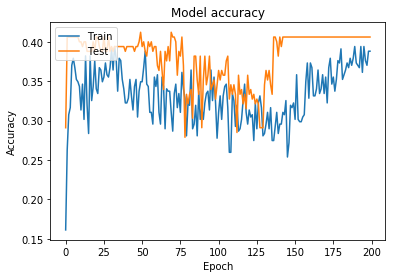

In [24]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

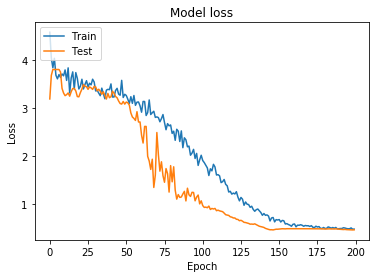

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()